https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2023/03-classification/homework.md

In [205]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [206]:
def load_data():
    return pd.read_csv('car_price_data-w3.csv')

In [207]:
df_raw = load_data()
df_raw.head(2)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


In [208]:
def prepare_columns_names(df):
    data = df.copy()
    data.columns = data.columns.str.lower().str.replace(' ', '_')
    return data

In [209]:
def prepare_string_column_values(df):
    data = df.copy()
    strings = list(data.dtypes[data.dtypes == 'object'].index)

    for col in strings:
        data[col] = data[col].str.lower().str.replace(' ', '_')
        data[col] = data[col].str.lower().str.replace('/', '_')
    
    return data

In [210]:
df = prepare_columns_names(df_raw)
df = prepare_string_column_values(df)
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [211]:
features = [
    'make',
    'model',
    'year',
    'engine_hp',
    'engine_cylinders',
    'transmission_type',
    'vehicle_style',
    'highway_mpg',
    'city_mpg'
]

In [212]:
df[features]

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18
...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16
11910,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16
11911,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16
11912,acura,zdx,2013,300.0,6.0,automatic,4dr_hatchback,23,16


In [213]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [214]:
df = df[features + ['msrp']].fillna(0)
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [215]:
df = df.rename(columns={'msrp': 'price'})
df.head(2)

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650


### Question 1

What is the most frequent observation (mode) for the column `transmission_type`?

- `AUTOMATIC` <=
- `MANUAL`
- `AUTOMATED_MANUAL`
- `DIRECT_DRIVE`


In [216]:
df.transmission_type.value_counts()

automatic           8266
manual              2935
automated_manual     626
direct_drive          68
unknown               19
Name: transmission_type, dtype: int64

### Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset. 
In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

- `engine_hp` and `year`
- `engine_hp` and `engine_cylinders`
- `highway_mpg` and `engine_cylinders`
- `highway_mpg` and `city_mpg` <=


### Make `price` binary

* Now we need to turn the `price` variable from numeric into a binary format.
* Let's create a variable `above_average` which is `1` if the `price` is above its mean value and `0` otherwise.

### Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value (`above_average`) is not in your dataframe.

In [217]:
df[features].corr().style.background_gradient(cmap='coolwarm', axis=None)

/var/folders/qq/4462k7m965791w_c1y5k4k480000gn/T/ipykernel_2516/2325726537.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[features].corr().style.background_gradient(cmap='coolwarm', axis=None)


,year,engine_hp,engine_cylinders,highway_mpg,city_mpg
year,1.000000,0.338714,-0.040708,0.258240,0.198171
engine_hp,0.338714,1.000000,0.774851,-0.415707,-0.424918
engine_cylinders,-0.040708,0.774851,1.000000,-0.614541,-0.587306
highway_mpg,0.258240,-0.415707,-0.614541,1.000000,0.886829
city_mpg,0.198171,-0.424918,-0.587306,0.886829,1.000000


In [218]:
price_avg = df.price.mean()
price_avg

40594.737032063116

In [219]:
df['above_average'] = (df.price > price_avg).astype(int)
df.head(2)

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135,1
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650,1


In [220]:
from sklearn.model_selection import train_test_split

In [221]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [222]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [223]:
df_train[:1].T

,0
make,mitsubishi
model,endeavor
year,2011
engine_hp,225.0
engine_cylinders,6.0
transmission_type,automatic
vehicle_style,4dr_suv
highway_mpg,19
city_mpg,15
price,33599


In [224]:
y_train = df_train.above_average.values # df_train.price.values
y_val = df_val.above_average.values     # df_val.price.values
y_test = df_test.above_average.values   # df_test.price.values

y_train_price = df_train.price.values
y_val_price = df_val.price.values
y_test_price = df_test.price.values

del df_train['price']
del df_val['price']
del df_test['price']

del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

In [225]:
df_train[:1].T

,0
make,mitsubishi
model,endeavor
year,2011
engine_hp,225.0
engine_cylinders,6.0
transmission_type,automatic
vehicle_style,4dr_suv
highway_mpg,19
city_mpg,15


### Question 3

* Calculate the mutual information score between `above_average` and other categorical variables in our dataset. 
  Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the lowest mutual information score?
  
- `make`
- `model`
- `transmission_type` <= transmission_type
- `vehicle_style`

In [226]:
from sklearn.metrics import mutual_info_score

In [227]:
categorical = list(df_train.dtypes[df_train.dtypes == 'object'].index)
categorical

['make', 'model', 'transmission_type', 'vehicle_style']

In [228]:
len(df_train.make), len(above_average_train)

(7148, 7148)

In [229]:
def mutual_info_above_average_score(series):
    return mutual_info_score(series, y_train)

In [230]:
mi = df_train[categorical]
mi = mi.apply(mutual_info_above_average_score)
mi.sort_values(ascending=False)

model                0.462344
make                 0.239769
vehicle_style        0.084143
transmission_type    0.020958
dtype: float64

### Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.60
- 0.72
- 0.84
- 0.95 <=

In [231]:
from sklearn.feature_extraction import DictVectorizer

In [232]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

test_dict = df_test.to_dict(orient='records')
X_test = dv.transform(test_dict)

In [233]:
from sklearn.linear_model import LogisticRegression

In [234]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

In [235]:
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [236]:
model.intercept_[0]

-0.39215857714206603

In [ ]:
model.coef_[0].round(3)

In [237]:
y_pred = model.predict_proba(X_val)[:, 1]

(y_val == (y_pred >= 0.5)).mean().round(2)

0.95

### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 

Which of following feature has the smallest difference?

- `year` <=
- `engine_hp`
- `transmission_type`
- `city_mpg`

> **Note**: the difference doesn't have to be positive

In [358]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.linear_model import LogisticRegression

df_raw = load_data()
df = prepare_columns_names(df_raw)
df = prepare_string_column_values(df)

df = df[features + ['msrp']].fillna(0)
df = df.rename(columns={'msrp': 'price'})

price_avg = df.price.mean()
df['above_average'] = (df.price > price_avg).astype(int)

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.above_average.values # df_train.price.values
y_val = df_val.above_average.values     # df_val.price.values
y_test = df_test.above_average.values   # df_test.price.values

del df_train['price']
del df_val['price']
del df_test['price']

del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

categorical = list(df_train.dtypes[df_train.dtypes == 'object'].index)

from sklearn.feature_extraction import DictVectorizer

In [359]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

test_dict = df_test.to_dict(orient='records')
X_test = dv.transform(test_dict)

model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_val)[:, 1]

print(f"accuracy: {(y_val == (y_pred >= 0.5)).mean().round(2)}")

accuracy: 0.95


In [309]:
def exclude_column(df, column_name):
    new_df = df.copy()
    new_df = new_df.loc[:, new_df.columns != column_name]
    return new_df

def find_accuracy(df_train, y_train, df_val, y_val, column_to_exclude:str = None):
    dv = DictVectorizer(sparse=False)

    if exclude_column is not None:        
        df_train = exclude_column(df_train, column_to_exclude)
        df_val = exclude_column(df_val, column_to_exclude)        

    train_dict = df_train.to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)
    
    val_dict = df_val.to_dict(orient='records')
    X_val = dv.transform(val_dict)
    
    model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:, 1]

    accuracy = (y_val == (y_pred >= 0.5)).mean().round(5)

    return accuracy

In [ ]:
Which of following feature has the smallest difference?
year
engine_hp
transmission_type
city_mpg

In [321]:
base_accuracy = find_accuracy(df_train, y_train, df_val, y_val)
accuracy = base_accuracy
print(f"accuracy: {accuracy}, excluded column: {None}")
diffs = []

# for col in df_train.columns:
for col in ['year', 'engine_hp', 'transmission_type', 'city_mpg']:
    accuracy = find_accuracy(df_train, y_train, df_val, y_val, col)
    diff = abs((base_accuracy - accuracy).round(7))
    print(f"accuracy: {accuracy}, excluded column: {col}, diff: {diff}")
    diffs.append(diff)

diffs.sort()
print(diffs)

accuracy: 0.94545, excluded column: None
accuracy: 0.94755, excluded column: year, diff: 0.0021
accuracy: 0.92279, excluded column: engine_hp, diff: 0.02266
accuracy: 0.94041, excluded column: transmission_type, diff: 0.00504
accuracy: 0.93244, excluded column: city_mpg, diff: 0.01301
[0.0021, 0.00504, 0.01301, 0.02266]


### Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn.
* We'll need to use the original column `price`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model on the training data with a solver `'sag'`. Set the seed to `42`.
* This model also has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`.
* Round your RMSE scores to 3 decimal digits.

Which of these alphas leads to the best RMSE on the validation set?

- 0
- 0.01
- <mark>0.1</mark>
- 1
- 10

> **Note**: If there are multiple options, select the smallest `alpha`.

In [360]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler

df_raw = load_data()
df = prepare_columns_names(df_raw)
df = prepare_string_column_values(df)

df = df[features + ['msrp']].fillna(0)
df = df.rename(columns={'msrp': 'price'})

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train['price'].values)
y_val = np.log1p(df_val['price'].values)
y_test = np.log1p(df_test['price'].values)

del df_train['price']
del df_val['price']
del df_test['price']

categorical = list(df_train.dtypes[df_train.dtypes == 'object'].index)
numerical = list(df_train.dtypes[df_train.dtypes != 'object'].index)

In [452]:
numerical

['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

In [412]:
# scale numerical values
scaler = StandardScaler()

for col in numerical:
    df_train[col] = scaler.fit_transform(df_train[col].values.reshape(-1, 1))
    df_val[col] = scaler.fit_transform(df_val[col].values.reshape(-1, 1))
    df_test[col] = scaler.fit_transform(df_test[col].values.reshape(-1, 1))

In [453]:
df_train['year'].values

array([2011, 2009, 2012, ..., 2012, 1993, 2015])

In [ ]:
dv = DictVectorizer(sparse=True)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

test_dict = df_test.to_dict(orient='records')
X_test = dv.transform(test_dict)

In [423]:
# dv.get_feature_names_out()
len(dv.get_feature_names_out())
# train_dict[0]

943

In [ ]:
model = Ridge(alpha=1.0, solver='sag', random_state=42, )
model.fit(X_train, y_train)

In [ ]:
y_val_pred = model.predict(X_val)
y_val_pred

In [ ]:
y_val

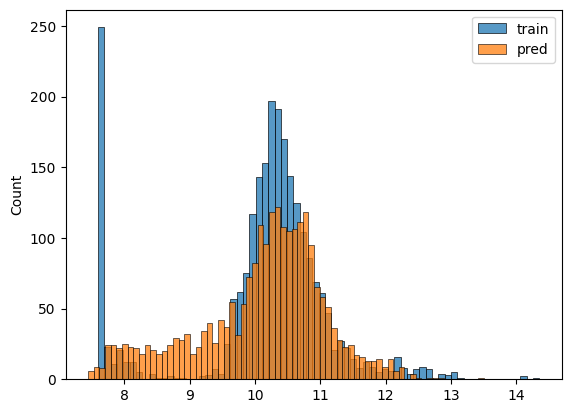

In [458]:
sns.histplot(y_val, bins=70, label='train')
sns.histplot(y_val_pred, bins=70, label='pred')
plt.legend()

In [459]:
rmse(y_val, y_val_pred).round(3)

0.487

In [ ]:
def train_ridge_model(alpha):
    model = Ridge(alpha=alpha, solver='sag', random_state=42, )
    model.fit(X_train, y_train)

    y_val_pred = model.predict(X_val)
    y_val_pred

    score = rmse(y_val, y_val_pred).round(7)
    return score

In [462]:
best_alpha = 1000000
best_score = 1000000

for alpha in [0, 0.01, 0.1, 1, 10]:
    score = train_ridge_model(alpha)

    if (score < best_score):
        best_score = score
        best_alpha = alpha
        
    print(score, alpha)

print()
print(f"best_alpha: {best_alpha}, best_score: {best_score}")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.4867943 0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.4867946 0.01


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.4867967 0.1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.4868182 1
0.4870323 10

best_alpha: 0, best_score: 0.4867943


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
